In [2]:
from xgboost import XGBRegressor
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read in Data 
filename = "Waves_2023.txt"
file = pd.DataFrame(pd.read_csv(filename, delim_whitespace=True))
df = (file[['WVHT','APD','DPD','MWD','WTMP']].copy()).dropna()

X = np.column_stack((df['APD'],df['DPD'],df['MWD'],df['WTMP']))
y = df['WVHT'].to_numpy()


/var/folders/bm/1zbxfdz545vb2vms38bdffv80000gn/T/ipykernel_19239/981794688.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  file = pd.DataFrame(pd.read_csv(filename, delim_whitespace=True))


In [4]:
# Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [53]:
# Fit the boosted regression tree
X_sets = [X_train, X_val, X_test]
y_sets = [y_train, y_val, y_test]
sets_names = ['Train', 'Validation', 'Test']
bst = XGBRegressor(n_estimators=25, learning_rate=0.4,eval_metric='rmse')

for i in range(3):
    bst = bst.fit(X_sets[i], y_sets[i])
    y_pred = bst.predict(X_sets[i])
    print(f"{sets_names[i]} Mean Squared Error: ", sk.metrics.mean_squared_error(y_sets[i], y_pred))


Train Mean Squared Error:  0.07084166553968789
Validation Mean Squared Error:  0.057288725005133094
Test Mean Squared Error:  0.05695493854714459


In [45]:
# Linear Regression
from sklearn import linear_model

reg1 = linear_model.LinearRegression()
reg1.fit(X_train,y_train)
print('Train = ', sk.metrics.mean_squared_error(y_train, reg1.predict(X_train)))

reg2 = linear_model.LinearRegression()
reg2.fit(X_train,y_train)
print('Val = ', sk.metrics.mean_squared_error(y_val, reg2.predict(X_val)))

reg3 = linear_model.LinearRegression()
reg3.fit(X_train,y_train)
print('Test = ', sk.metrics.mean_squared_error(y_test, reg3.predict(X_test)))

print('Linear Regression MSE = ', sk.metrics.mean_squared_error(y_test, reg3.predict(X_test)))



Train =  1.59664447790212
Val =  2.9468558741297
Test =  1.4712762516523503
Linear Regression MSE =  1.4712762516523503


In [36]:
# 1) The MSE for the boosted regression tree is lower than the MSE for the linear regression model.

# 2) The cost function for boosted regression is root mean squared error (RMSE) and the cost function for linear regression is mean squared error (MSE).

# 3) The hyperparameters for the boosted regression tree are n_estimators, learning_rate, early_stopping_rounds, and eval_metric. These are specified because the learning rate determines the contribution of each tree to the final prediction, the early stopping rounds is the number of rounds without improvement before stopping, and the eval_metric is the evaluation metric for early stopping. 



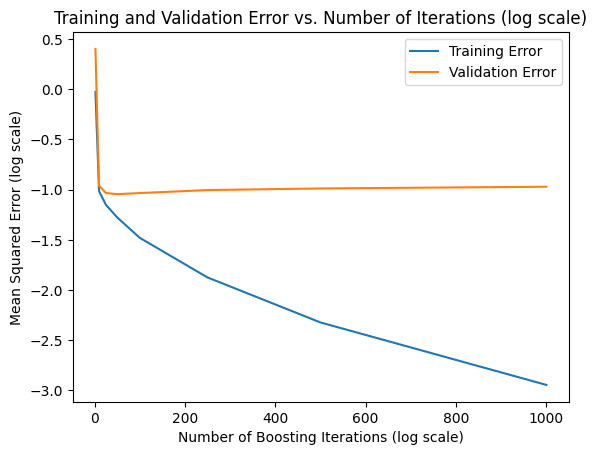

In [56]:
import numpy as np
# Define the number of boosting iterations
boosting_iterations = [2, 10, 25, 50, 100, 250, 500, 1000]

# Initialize lists to store training and validation errors
train_errors = []
val_errors = []

# Train the boosted regression tree for each number of iterations
for n in boosting_iterations:
    bst = XGBRegressor(n_estimators=n, learning_rate=0.4, eval_metric='rmse')
    bst = bst.fit(X_train, y_train)
    
    # Calculate training and validation errors
    train_pred = bst.predict(X_train)
    val_pred = bst.predict(X_val)
    train_error = sk.metrics.mean_squared_error(y_train, train_pred)
    val_error = sk.metrics.mean_squared_error(y_val, val_pred)
    
    # Append errors to the lists
    train_errors.append(train_error)
    val_errors.append(val_error)

# Plot the training and validation errors
plt.plot(boosting_iterations, np.log10(train_errors), label='Training Error')
plt.plot(boosting_iterations, np.log10(val_errors), label='Validation Error')
plt.xlabel('Number of Boosting Iterations (log scale)')
plt.ylabel('Mean Squared Error (log scale)')
plt.title('Training and Validation Error vs. Number of Iterations (log scale)')
plt.legend()
plt.show()


In [40]:
# 5) There does not appear to be signs of overfitting as the validation data error is not increasing as the number of iterations increases. The training error is decreasing as the number of iterations increases, which is expected.

[0]	validation_0-rmse:2.30510
[1]	validation_0-rmse:1.58745
[0]	validation_0-rmse:2.30510
[1]	validation_0-rmse:1.58745
[2]	validation_0-rmse:1.10781
[3]	validation_0-rmse:0.79271
[4]	validation_0-rmse:0.59253
[5]	validation_0-rmse:0.47001
[6]	validation_0-rmse:0.40102
[7]	validation_0-rmse:0.36221
[8]	validation_0-rmse:0.34025
[9]	validation_0-rmse:0.33070
[0]	validation_0-rmse:2.30510
[1]	validation_0-rmse:1.58745
[2]	validation_0-rmse:1.10781
[3]	validation_0-rmse:0.79271
[4]	validation_0-rmse:0.59253
[5]	validation_0-rmse:0.47001
[6]	validation_0-rmse:0.40102
[7]	validation_0-rmse:0.36221
[8]	validation_0-rmse:0.34025
[9]	validation_0-rmse:0.33070
[10]	validation_0-rmse:0.32402
[11]	validation_0-rmse:0.31967
[12]	validation_0-rmse:0.31875
[13]	validation_0-rmse:0.31747
[14]	validation_0-rmse:0.31697
[15]	validation_0-rmse:0.31568
[16]	validation_0-rmse:0.31480
[17]	validation_0-rmse:0.31225
[18]	validation_0-rmse:0.31138
[19]	validation_0-rmse:0.30995
[20]	validation_0-rmse:0.30746

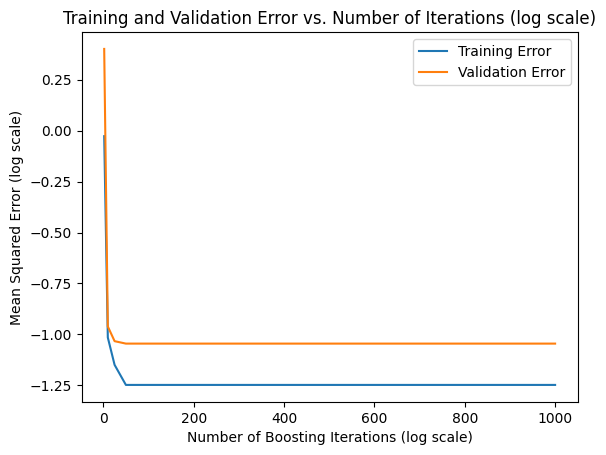

In [59]:
# Retrain the boosted regression tree WITHOUT early stopping
import numpy as np
# Define the number of boosting iterations
boosting_iterations = [2, 10, 25, 50, 100, 250, 500, 1000]

# Initialize lists to store training and validation errors
train_errors = []
val_errors = []

# Train the boosted regression tree for each number of iterations
for n in boosting_iterations:
    bst = XGBRegressor(n_estimators=n, learning_rate=0.4, eval_metric='rmse', early_stopping_rounds=10)
    bst = bst.fit(X_train, y_train,eval_set=[(X_val, y_val)])

    
    # Calculate training and validation errors
    train_pred = bst.predict(X_train)
    val_pred = bst.predict(X_val)
    train_error = sk.metrics.mean_squared_error(y_train, train_pred)
    val_error = sk.metrics.mean_squared_error(y_val, val_pred)
    
    # Append errors to the lists
    train_errors.append(train_error)
    val_errors.append(val_error)

# Plot the training and validation errors
plt.plot(boosting_iterations, np.log10(train_errors), label='Training Error')
plt.plot(boosting_iterations, np.log10(val_errors), label='Validation Error')
plt.xlabel('Number of Boosting Iterations (log scale)')
plt.ylabel('Mean Squared Error (log scale)')
plt.title('Training and Validation Error vs. Number of Iterations (log scale)')
plt.legend()
plt.show()

In [ ]:
# 6) The optimal boosting iterations is 25. This is because the validation error is minimized at this point. The training error is also minimized at this point, which is expected.